# Ensembles of Classification Trees

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
cancer = load_breast_cancer()

In [6]:
list1 = list(cancer.feature_names)

In [7]:
df0 = pd.DataFrame(cancer.data,columns = list1)
df0[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y = cancer.target
X = cancer.data

In [9]:
X.shape

(569, 30)

## Single Tree

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,
                                                 random_state = 0)

In [11]:
tree1 = DecisionTreeClassifier(max_depth = 4)
tree1.fit(X_train,y_train)
tree1.score(X_test,y_test)

0.916083916083916

## Bagging model (500 Trees)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,
                                                 random_state = 0)

In [13]:
bag_model = RandomForestClassifier(max_features = 30,
                                   max_depth = 4,
                                   n_estimators = 500,
                                   random_state=0)
bag_model.fit(X_train,y_train)
bag_model.score(X_test,y_test)

0.9300699300699301

## Bagging model (25 Trees)

In [14]:
bag_model2 = RandomForestClassifier(max_features = 30,
                                   max_depth = 4,                                    
                                   n_estimators = 25,
                                    random_state=0)
bag_model2.fit(X_train,y_train)
bag_model2.score(X_test,y_test)

0.9230769230769231

## GridSearchCV on n_estimators

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,
                                                 random_state = 0)

In [16]:
model1 = RandomForestClassifier(max_depth=4, random_state=1)

In [17]:
kfold = StratifiedKFold(n_splits=5,shuffle = True, 
                                    random_state = 1)

In [18]:
estimators = range(100,1000,100)
params = dict(n_estimators = estimators)

In [19]:
grid1 = GridSearchCV(model1,param_grid = params,cv = kfold)
grid1.fit(X_train,y_train);

In [20]:
# Best Validation Accuracy rate
grid1.best_score_

0.9647058823529413

In [21]:
grid1.best_params_

{'n_estimators': 500}

### Test Accuracy rate

In [22]:
grid1.score(X_test,y_test)

0.9440559440559441

### Importance

In [23]:
df9 = pd.DataFrame(grid1.best_estimator_.feature_importances_*100,
                   index = cancer.feature_names,
                   columns = ['Importance'])
df9.columns.name = 'Feature'
df9 = df9.sort_values(by='Importance',axis=0,ascending = False)
df9

Feature,Importance
worst perimeter,14.129173
worst concave points,13.576649
worst radius,11.579474
worst area,11.495622
mean concave points,10.388860
mean concavity,6.064789
mean perimeter,5.184134
mean area,4.173711
worst concavity,4.033597
mean radius,3.920080


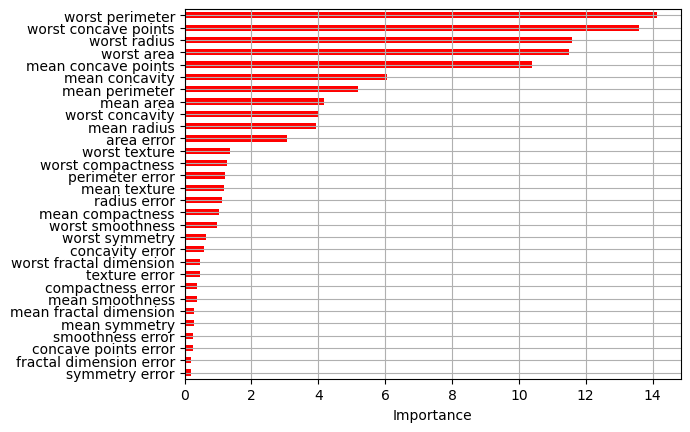

In [24]:
df9 = df9.sort_values(by='Importance',axis=0)
df9.plot(kind='barh',color='r',legend=False)
plt.xlabel('Importance')
plt.grid()

# Random Forest

In [25]:
# Not all 13 predictors will be considered at each split
# max_features m < n. predictors p

## RandomForest on 500 Trees (max_features = 5)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,
                                                 random_state = 0)

In [27]:
forest = RandomForestClassifier(max_features = 5,n_estimators = 500,
                                max_depth = 4,random_state = 1)
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.9440559440559441

## RandomForest on 25 Trees

In [28]:
forest2 = RandomForestClassifier(max_features = 5,n_estimators = 25,
                                max_depth = 4,random_state = 1)
forest2.fit(X_train,y_train)
forest2.score(X_test,y_test)

0.9370629370629371

## GridSearchCV on max_features

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,
                                                 random_state = 0)

In [30]:
model3 = RandomForestClassifier(max_depth=4,n_estimators = 500,
                                random_state=1)

In [31]:
kfold = StratifiedKFold(n_splits=5,shuffle = True, random_state = 1)

In [32]:
features = range(1,31)
params = dict(max_features = features)

In [33]:
grid1 = GridSearchCV(model3,param_grid = params,cv = kfold)
grid1.fit(X_train,y_train);

In [34]:
# Best Validation Accuracy rate
grid1.best_score_

0.9670861833105336

In [35]:
grid1.best_params_

{'max_features': 14}

### Test Accuracy rate

In [36]:
grid1.score(X_test,y_test)

0.9440559440559441

### Importance

In [37]:
df9 = pd.DataFrame(grid1.best_estimator_.feature_importances_*100,
                   index = cancer.feature_names,
                   columns = ['Importance'])
df9.columns.name = 'Feature'
df9 = df9.sort_values(by='Importance',axis=0,ascending = False)
df9

Feature,Importance
worst perimeter,22.611353
worst concave points,22.232967
worst area,13.548250
worst radius,13.065276
mean concave points,12.862108
mean concavity,2.457333
worst texture,2.010432
worst concavity,1.912220
mean texture,1.644063
area error,0.999653


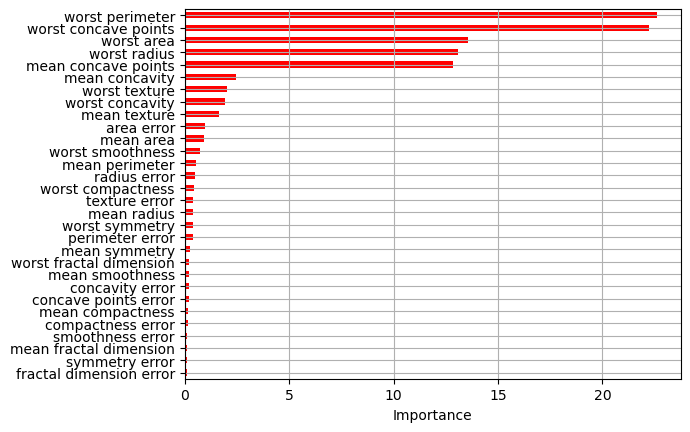

In [38]:
df9 = df9.sort_values(by='Importance',axis=0)
df9.plot(kind='barh',color='r',legend=False)
plt.xlabel('Importance')
plt.grid()

## Gradient Boosting

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,
                                                 random_state=0)

### learning rate to 0.60

In [52]:
model2 = GradientBoostingClassifier(n_estimators = 25,
                                      learning_rate = 0.6,
                                      max_depth = 4, random_state =1)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.9370629370629371

### learning rate to 0.10

In [53]:
model2 = GradientBoostingClassifier(n_estimators = 25,
                                      learning_rate = 0.1,
                                      max_depth = 4, random_state =1)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.951048951048951

In [54]:
# feature importance from model2
df9 = pd.DataFrame(model2.feature_importances_*100,
                   index = cancer.feature_names,
                   columns = ['Importance'])
df9.columns.name = 'feature'
df9 = df9.sort_values(by='Importance',axis=0,ascending = False)
df9

feature,Importance
worst perimeter,73.709612
worst concave points,7.801738
mean concave points,4.010190
worst texture,3.783620
mean texture,2.604245
concave points error,1.915741
worst radius,1.541126
worst area,1.366006
area error,1.000423
mean symmetry,0.706863


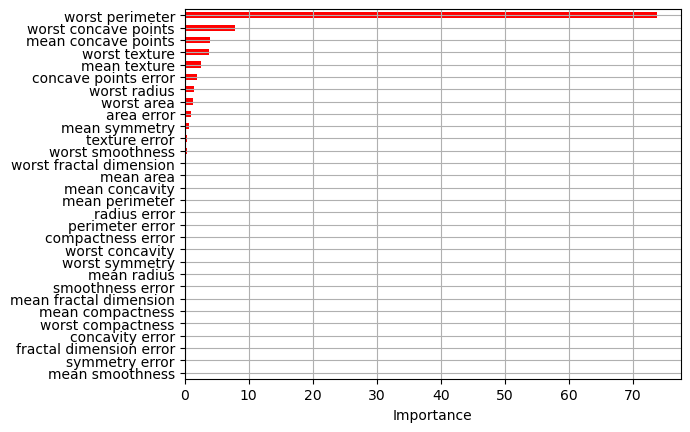

In [55]:
df9 = df9.sort_values(by='Importance',axis=0)
df9.plot(kind='barh',color='r',legend=False)
plt.xlabel('Importance')
plt.grid()

## GridSearchCV on learning_rate

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,
                                                 random_state = 0)

In [57]:
model3 = GradientBoostingClassifier(n_estimators = 25,
                                      max_depth = 4, random_state =1)

In [58]:
lrates = np.linspace(0.0,1.0,20)
lrates

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [59]:
kfold = StratifiedKFold(n_splits=5,shuffle = True, random_state = 1)

In [60]:
params = dict(learning_rate = lrates)

In [61]:
grid1 = GridSearchCV(model3,param_grid = params,cv = kfold)
grid1.fit(X_train,y_train);

In [62]:
# Best Validation Accuracy rate
grid1.best_score_

0.9671135430916553

In [63]:
grid1.best_params_

{'learning_rate': 0.631578947368421}

### Test Accuracy rate

In [53]:
grid1.score(X_test,y_test)

0.9300699300699301

In [86]:
Importances = grid1.best_estimator_.feature_importances_*100
df9 = pd.DataFrame({'Importance':Importances},
                    index = cancer.feature_names)
df9 = df9.sort_values(by = 'Importance',axis = 0,
                      ascending = False)
df9

,Importance
worst perimeter,59.099340
worst radius,14.847550
worst concave points,11.161615
mean texture,3.231188
worst texture,3.098257
mean concave points,2.843215
area error,1.067154
worst concavity,0.949111
texture error,0.799159
worst fractal dimension,0.725911


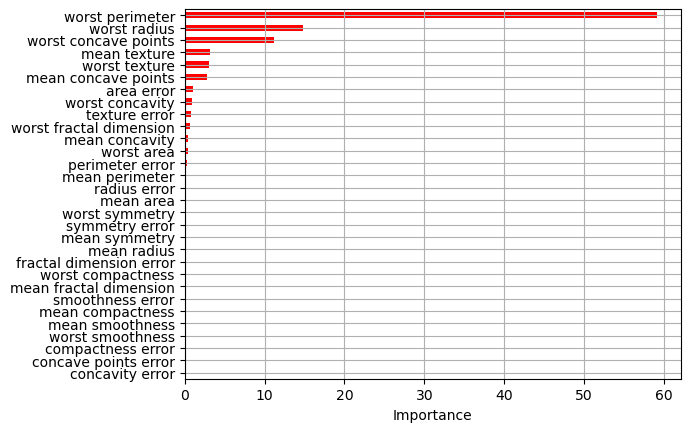

In [88]:
df9 = df9.sort_values(by = 'Importance',axis = 0,ascending = True)
df9.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Importance')
plt.gca().legend_ = None
plt.grid()

## GridSearchCV on learning_rate and max_features

In [56]:
# Consider 6 values for each parameter
params = {'learning_rate': np.linspace(0.2,0.7,6),
              'max_features': list(range(3,9))}
params

{'learning_rate': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 'max_features': [3, 4, 5, 6, 7, 8]}

In [57]:
grid2 = GridSearchCV(model3, param_grid = params,cv = kfold)
grid2.fit(X_train,y_train);

In [58]:
# Best Validation Accuracy rate
grid2.best_score_

0.9741723666210671

In [59]:
grid2.best_params_

{'learning_rate': 0.6, 'max_features': 6}

cv_results_ has the accuracy rates of each fold and their average in column mean_test_score

In [60]:
# grid2.cv_results_ has information
# about the results of each fold
# and the average accuracy rate
# for each value of learning_rate, max_features

In [61]:
# store the results into dataframe
results = pd.DataFrame(grid2.cv_results_)
results.shape

(36, 15)

In [62]:
# Select columns with the parameter values 
# and average accuracy rates

In [63]:
df9 = results.iloc[:,[4,5,12]].copy()
df9

,param_learning_rate,param_max_features,mean_test_score
0,0.2,3,0.957674
1,0.2,4,0.960055
2,0.2,5,0.960027
3,0.2,6,0.957729
4,0.2,7,0.964733
5,0.2,8,0.962380
6,0.3,3,0.962408
7,0.3,4,0.955376
8,0.3,5,0.967086
9,0.3,6,0.962435


In [64]:
df9.param_learning_rate = df9.param_learning_rate.astype('float64')
df9.param_learning_rate = df9.param_learning_rate.round(3)
df9[:13]

,param_learning_rate,param_max_features,mean_test_score
0,0.2,3,0.957674
1,0.2,4,0.960055
2,0.2,5,0.960027
3,0.2,6,0.957729
4,0.2,7,0.964733
5,0.2,8,0.962380
6,0.3,3,0.962408
7,0.3,4,0.955376
8,0.3,5,0.967086
9,0.3,6,0.962435


In [65]:
# Show mean_test_score (the accuracy rate)
# for each combination of: max_features, learning_rate
# in a two-way table

In [66]:
df1 = df9.pivot_table('mean_test_score',
                      columns = 'param_learning_rate',
                      index = 'param_max_features')
df1

param_learning_rate,0.2,0.3,0.4,0.5,0.6,0.7
param_max_features,,,,,,
3,0.957674,0.962408,0.969412,0.967059,0.974118,0.967086
4,0.960055,0.955376,0.967086,0.971792,0.960055,0.955376
5,0.960027,0.967086,0.964761,0.962408,0.962435,0.967059
6,0.957729,0.962435,0.960055,0.967114,0.974172,0.967086
7,0.964733,0.960109,0.971765,0.969439,0.964733,0.969466
8,0.962380,0.969412,0.962408,0.955349,0.967114,0.964761


In [67]:
# transform df1 dataframe to numpy array
arates = df1.values
arates = np.round(arates,4)
arates

array([[0.9577, 0.9624, 0.9694, 0.9671, 0.9741, 0.9671],
       [0.9601, 0.9554, 0.9671, 0.9718, 0.9601, 0.9554],
       [0.96  , 0.9671, 0.9648, 0.9624, 0.9624, 0.9671],
       [0.9577, 0.9624, 0.9601, 0.9671, 0.9742, 0.9671],
       [0.9647, 0.9601, 0.9718, 0.9694, 0.9647, 0.9695],
       [0.9624, 0.9694, 0.9624, 0.9553, 0.9671, 0.9648]])

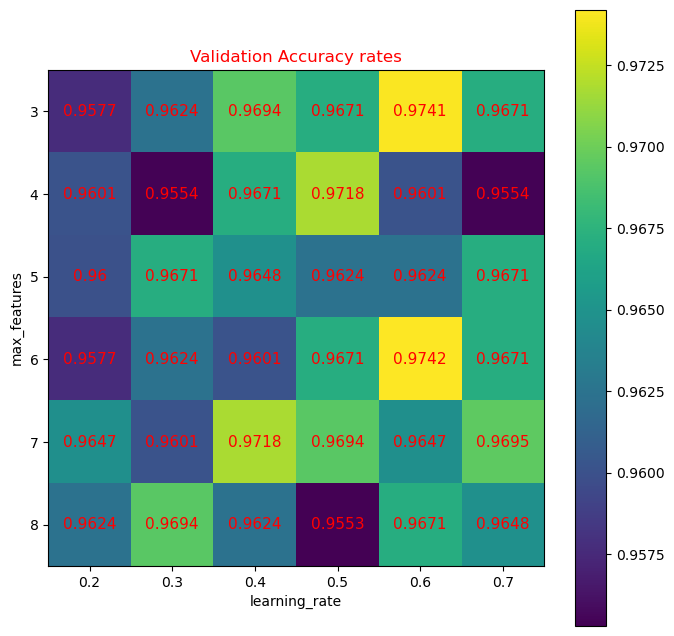

In [68]:
plt.figure(figsize=(8,8))
plt.xticks(range(6),df1.columns)
plt.yticks(range(6),df1.index)
plt.ylabel('max_features')
plt.xlabel('learning_rate')
plt.title('Validation Accuracy rates',c='r')
plt.imshow(arates)
for i in range(6):
    for j in range(6):
        text = plt.text(j,i,arates[i,j],
                        ha="center",
                        va="center",
                        color="r",
                        size = 11)
plt.colorbar();

### Test Accuracy rate

In [69]:
grid2.score(X_test,y_test)

0.9440559440559441

In [70]:
list1 = list(cancer.feature_names)

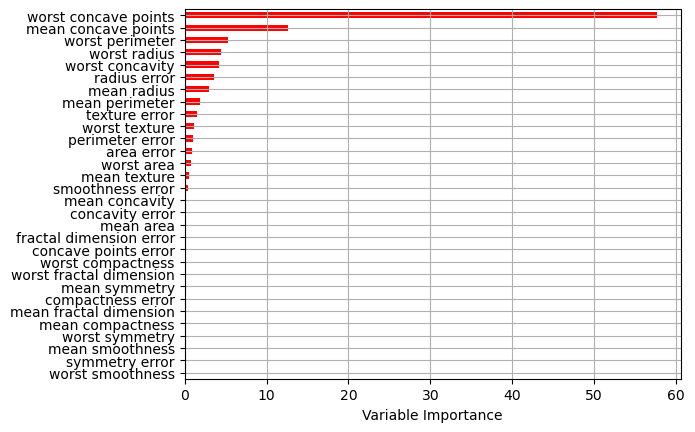

In [71]:
Importances = grid2.best_estimator_.feature_importances_*100
Importance2 = pd.DataFrame({'Importance':Importances},index = list1)
df9 = Importance2.sort_values(by = 'Importance',axis = 0,ascending = True)
df9.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()